In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
cases = pd.read_json('https://data.cdc.gov/resource/9mfq-cb36.json?$limit=35000') # limit is required to pull more rows
# if len says at limit, increase the value

In [4]:
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-02-02T00:00:00.000,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,2021-02-03 14:55:58.025,Agree,Agree
1,2020-07-30T00:00:00.000,ME,3910,3497.0,413.0,22,2.0,123,122.0,1.0,2,0.0,2020-07-31 14:35:06.518,Agree,Agree
2,2020-05-03T00:00:00.000,NH,2518,NaN,NaN,89,0.0,86,NaN,NaN,2,0.0,2020-05-04 22:49:24.344,Not agree,Not agree
3,2020-12-04T00:00:00.000,IN,367338,NaN,NaN,7899,0.0,7031,6746.0,285.0,91,1.0,2020-12-04 00:00:00.000,Not agree,Agree
4,2021-01-28T00:00:00.000,CA,3409079,3285871.0,123208.0,18703,892.0,49603,49603.0,0.0,494,0.0,2021-01-28 00:00:00.000,Agree,Agree


In [5]:
len(cases)

33360

In [6]:
cases['state'].unique()

array(['IL', 'ME', 'NH', 'IN', 'CA', 'GU', 'CT', 'WI', 'NV', 'MI', 'DE',
       'ID', 'MO', 'NE', 'WA', 'AL', 'MD', 'VT', 'MS', 'ND', 'VI', 'MT',
       'NC', 'LA', 'DC', 'NJ', 'KY', 'WY', 'RI', 'FSM', 'AZ', 'SC', 'VA',
       'MN', 'OR', 'UT', 'MP', 'AR', 'PW', 'FL', 'MA', 'PR', 'OK', 'GA',
       'AK', 'HI', 'WV', 'KS', 'NYC', 'AS', 'CO', 'TX', 'RMI', 'IA', 'NM',
       'NY', 'OH', 'SD', 'PA', 'TN'], dtype=object)

In [7]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33360 entries, 0 to 33359
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  33360 non-null  object        
 1   state            33360 non-null  object        
 2   tot_cases        33360 non-null  int64         
 3   conf_cases       16568 non-null  float64       
 4   prob_cases       16497 non-null  float64       
 5   new_case         33360 non-null  int64         
 6   pnew_case        29075 non-null  float64       
 7   tot_death        33360 non-null  int64         
 8   conf_death       17037 non-null  float64       
 9   prob_death       17037 non-null  float64       
 10  new_death        33360 non-null  int64         
 11  pnew_death       29015 non-null  float64       
 12  created_at       33360 non-null  datetime64[ns]
 13  consent_cases    30580 non-null  object        
 14  consent_deaths   30580 non-null  objec

In [8]:
cases['date'] = pd.to_datetime(cases['created_at'])

<AxesSubplot:xlabel='date'>

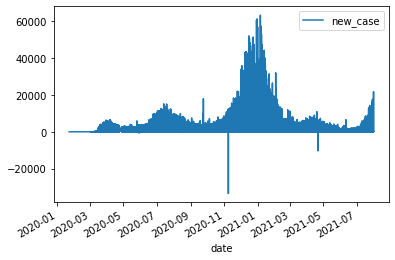

In [9]:
cases.plot('date','new_case')

In [10]:
la_case = cases[cases['state']=='LA'].copy()
la_case.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,date
6394,2020-11-06T00:00:00.000,LA,191715,NaN,NaN,870,0.0,6016,5787.0,229.0,21,0.0,2020-11-07 14:45:17.940,Not agree,Agree,2020-11-07 14:45:17.940
6412,2020-10-06T00:00:00.000,LA,170469,NaN,NaN,532,0.0,5592,5402.0,190.0,6,0.0,2020-10-07 13:45:01.309,Not agree,Agree,2020-10-07 13:45:01.309
6423,2021-01-14T00:00:00.000,LA,361148,NaN,NaN,5313,2187.0,8080,7631.0,449.0,58,9.0,2021-01-15 14:46:04.456,Not agree,Agree,2021-01-15 14:46:04.456
6424,2020-08-17T00:00:00.000,LA,138485,NaN,NaN,567,0.0,4526,4403.0,123.0,19,0.0,2020-08-18 14:26:55.280,Not agree,Agree,2020-08-18 14:26:55.280
6427,2020-12-22T00:00:00.000,LA,290960,NaN,NaN,3699,933.0,7158,6813.0,345.0,51,13.0,2020-12-23 14:36:58.341,Not agree,Agree,2020-12-23 14:36:58.341


In [11]:
la_case['date'].dtype

dtype('<M8[ns]')

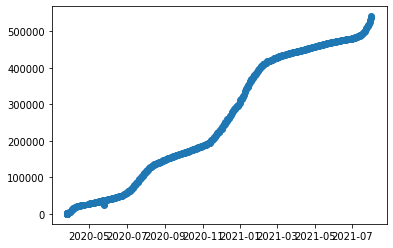

In [12]:
plt.scatter(la_case['date'],la_case['tot_cases'])

<AxesSubplot:xlabel='date'>

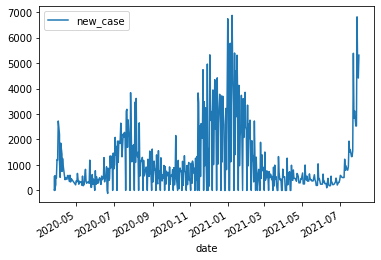

In [13]:
la_case.plot('date','new_case')

In [14]:
la_case.sort_values(by='date', inplace=True)

In [15]:
la_case['seven_day_case_avg'] = la_case['new_case'].rolling(7,1).mean()

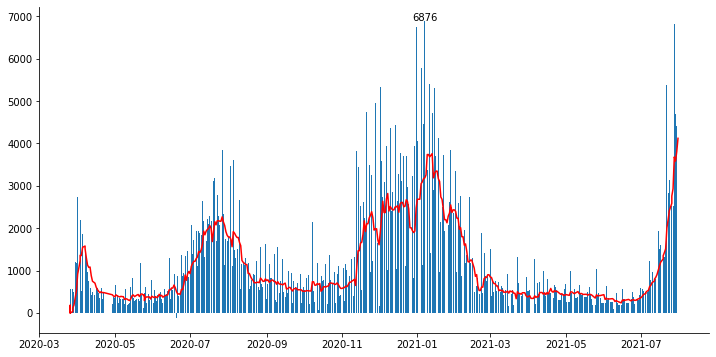

In [16]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case['date'].dt.date, la_case['new_case'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case['new_case'].max()
peak_date = la_case.loc[la_case['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+20), ha='center')

plt.show()

In [17]:
import datetime as dt

In [18]:
offset_date = dt.date.today()-dt.timedelta(90)

In [19]:
la_case_3m = la_case[la_case['date'].dt.date>offset_date].copy()

In [20]:
la_case.iloc[0]

submission_date          2020-03-13T00:00:00.000
state                                         LA
tot_cases                                     33
conf_cases                                   NaN
prob_cases                                   NaN
new_case                                      19
pnew_case                                    NaN
tot_death                                      0
conf_death                                   NaN
prob_death                                   NaN
new_death                                      0
pnew_death                                   NaN
created_at            2020-03-26 16:22:39.452000
consent_cases                          Not agree
consent_deaths                             Agree
date                  2020-03-26 16:22:39.452000
seven_day_case_avg                            19
Name: 7864, dtype: object

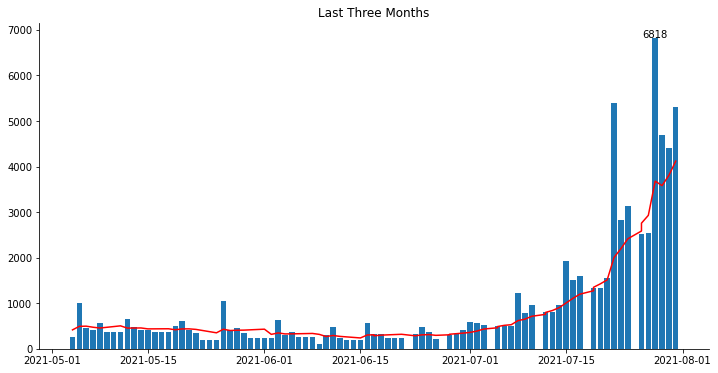

In [21]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_case'])

ax.set_title('Last Three Months')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_case'].max()
peak_date = la_case_3m.loc[la_case_3m['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+10), ha='center')

plt.show()

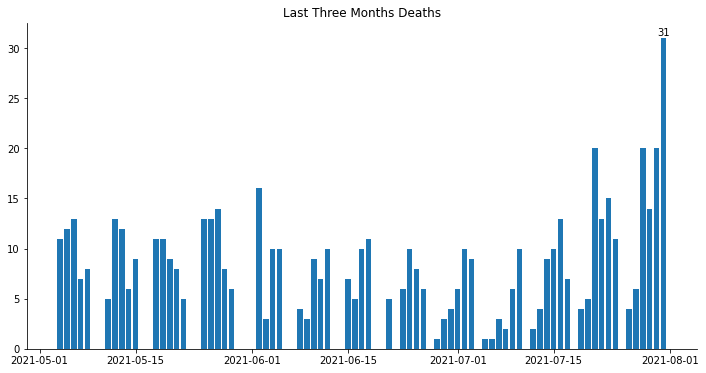

In [22]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='k')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_death'])

ax.set_title('Last Three Months Deaths')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_death'].max()
peak_date = la_case_3m.loc[la_case_3m['new_death'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+.25), ha='center')

plt.show()

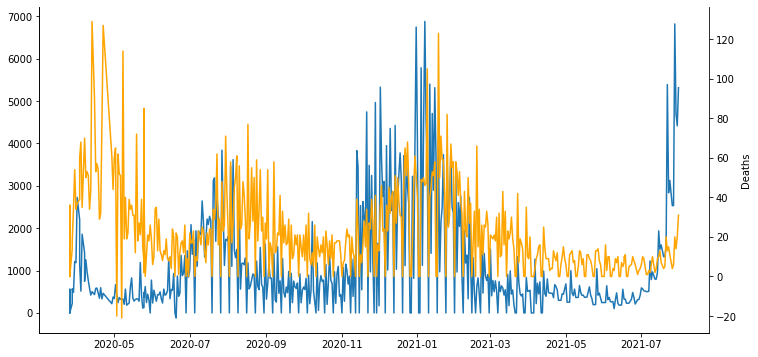

In [23]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.plot(la_case['date'].dt.date, la_case['new_case'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
b2 = ax2.plot(la_case['date'].dt.date, la_case['new_death'], c='orange')
ax2.set_ylabel("Deaths")

ax2.spines['top'].set_visible(False)

plt.show()

In [24]:
from sklearn.preprocessing import scale

In [25]:
la_case_death = la_case[['new_case','new_death']]
la_case_death.describe()

,new_case,new_death
count,556.000000,556.000000
mean,973.408273,19.782374
std,1217.710234,21.486080
min,-119.000000,-21.000000
25%,227.750000,2.000000
50%,518.500000,14.000000
75%,1214.750000,29.000000
max,6876.000000,129.000000


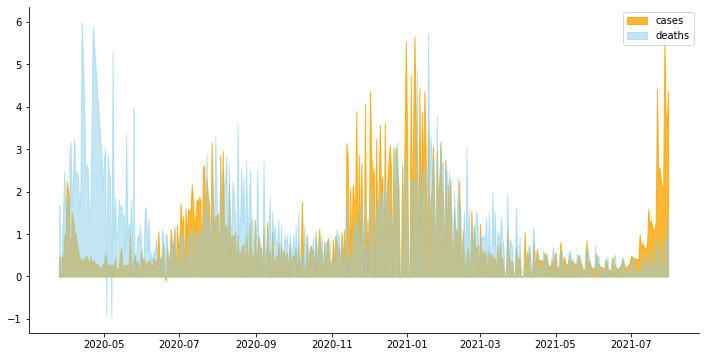

In [26]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_case'],with_mean=False),
                     color='orange', alpha=0.8, label='cases')
b2 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_death'],with_mean=False),
                     color='skyblue', alpha=0.5, label='deaths')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

plt.show()

In [27]:
la_case[['date','new_case','new_death']].tail(30)

,date,new_case,new_death
32929,2021-07-02 13:55:07.236,568,10
7913,2021-07-03 13:44:06.775,525,9
9631,2021-07-05 13:25:13.278,503,1
32844,2021-07-05 14:30:02.367,503,1
30608,2021-07-06 13:52:24.339,503,1
7596,2021-07-07 14:48:49.531,508,3
6532,2021-07-08 14:26:57.178,1226,2
30305,2021-07-09 13:56:56.578,786,6
8837,2021-07-10 14:17:36.847,969,10
7243,2021-07-12 13:16:46.339,797,2
